In [1]:
pip install pydataset


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 4.9 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=2bcb0a542225378ab10a958f502977fbe09b64cfc4fa558735c699dc60fa0e89
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


In [2]:
# import packages
import pandas as pd
import numpy as np
from os import makedirs
from os import path
import math
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import nltk.downloader
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pydataset import data
from sklearn.ensemble        import BaggingClassifier, \
         ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import RidgeClassifier
from sklearn.svm             import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

import pickle
import json

initiated datasets repo at: /root/.pydataset/


In [3]:
df = pd.read_csv("/content/The Climate Change Twitter Dataset.csv")

In [4]:
df.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132.0,NaN,NaN,Weather Extremes,-0.10,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275.0,-73.95,40.65,Weather Extremes,0.58,neutral,undefined,-1.11,aggressive
2,2006-08-29 01:52:30+00:00,23160.0,NaN,NaN,Weather Extremes,0.50,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868.0,NaN,NaN,Weather Extremes,0.03,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553.0,NaN,NaN,Importance of Human Intervantion,-0.09,neutral,male,NaN,aggressive


In [5]:
df = df.dropna()

In [6]:
df.index = range(len(df))

In [7]:
df = df.drop(['id'],axis=1)

In [8]:
df = df.drop(['gender'],axis=1)

In [9]:
df.head()

,created_at,lng,lat,topic,sentiment,stance,temperature_avg,aggressiveness
0,2006-07-23 21:52:30+00:00,-73.95,40.65,Weather Extremes,0.58,neutral,-1.11,aggressive
1,2006-12-14 01:39:10+00:00,-122.42,37.77,Ideological Positions on Global Warming,-0.54,neutral,4.23,aggressive
2,2006-12-17 19:43:09+00:00,-79.79,36.07,Weather Extremes,-0.57,denier,5.48,aggressive
3,2006-12-21 01:39:01+00:00,-121.81,38.00,Weather Extremes,0.65,neutral,-1.65,not aggressive
4,2006-12-31 10:47:25+00:00,-1.90,52.48,Weather Extremes,0.67,neutral,4.86,aggressive


In [10]:
##Getting month and year from the created_at columns which specifies the date at which user has tweeted 
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['month_year'] = df['created_at'].dt.to_period('M')

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [11]:
##Mapping stance column to integer( Believer implies 1 , Neutral implies 0 and Denier implies -1)
stance_dict = {'believer' : 1,
                'neutral' : 0,
                'denier' : -1,
                }


df['stance'] = df['stance'].map(stance_dict )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312693 entries, 0 to 312692
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   created_at       312693 non-null  datetime64[ns, UTC]
 1   lng              312693 non-null  float64            
 2   lat              312693 non-null  float64            
 3   topic            312693 non-null  object             
 4   sentiment        312693 non-null  float64            
 5   stance           312693 non-null  int64              
 6   temperature_avg  312693 non-null  float64            
 7   aggressiveness   312693 non-null  object             
 8   month_year       312693 non-null  period[M]          
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(2), period[M](1)
memory usage: 21.5+ MB


In [13]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 7.8 MB 64.4 MB/s 
     |████████████████████████████████| 16.6 MB 125 kB/s 


**Map of tweets from around the world using longitude and lattitude**

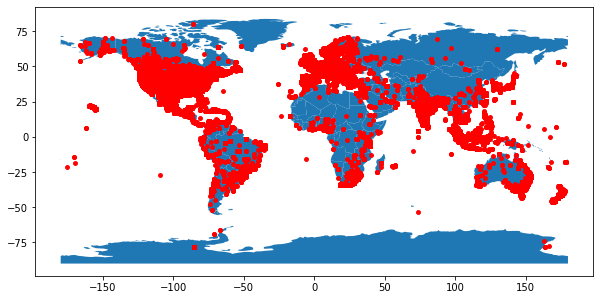

In [ ]:
##Below is the map of Tweets by the users around the world fetched by longitude and longitude
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

**Grid Analysis of Sentiment of people around of world using Coordinates**

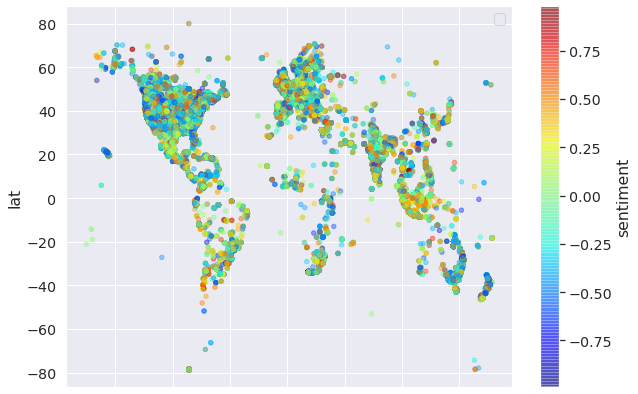

In [ ]:
df.plot(kind="scatter", x="lng", y="lat",
    c="sentiment", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
#save_fig("housing_prices_scatterplot")
plt.show()

**Average historic temperature deviation versus climate change denier/believer ratio over time**

In [ ]:
df_avg_temp = df[['temperature_avg','month_year','stance']]
df_avg_temp

,temperature_avg,month_year,stance
0,-1.11,2006-07,0
1,4.23,2006-12,0
2,5.48,2006-12,-1
3,-1.65,2006-12,0
4,4.86,2006-12,0
...,...,...,...
312688,1.82,2011-03,-1
312689,-0.25,2011-03,0
312690,-1.24,2011-03,0
312691,1.06,2011-03,0


In [ ]:
##Getting temperature avg column by Month and year
df_new = df_avg_temp.groupby(pd.PeriodIndex(df['month_year'], freq="M"))['temperature_avg'].mean().reset_index()
df_new

,month_year,temperature_avg
0,2006-07,-1.110000
1,2006-12,3.230000
2,2007-01,1.783889
3,2007-02,0.776000
4,2007-03,1.892985
5,2007-04,-0.102222
6,2007-05,0.861486
7,2007-06,0.641667
8,2007-07,-0.367344
9,2007-08,0.412480


In [ ]:
##Getting the count of stance grouping by month
df_stance_temp = pd.crosstab(df['stance'], pd.PeriodIndex(df['month_year'], freq='M'))
#transposing the data frame
df_stance_temp = df_stance_temp.T
df_stance_temp = df_stance_temp.add_prefix('stance ').reset_index().rename_axis(None, axis=1) 
#renaming the columns
df_new['stance_-1'] = df_stance_temp['stance -1']
df_new['stance_0'] = df_stance_temp['stance 0']
df_new['stance_1'] = df_stance_temp['stance 1']
##Getting the denier believer ratio by diving the stance = -1 and stance =1 column
df_new['denier_believer_ratio'] = df_new['stance_-1']/df_new['stance_1']
df_new['month_year'] = df_new['month_year'].dt.to_timestamp()
df_new = df_new.iloc[3:]
df_new

,month_year,temperature_avg,stance_-1,stance_0,stance_1,denier_believer_ratio
3,2007-02-01,0.776000,0,18,17,0.000000
4,2007-03-01,1.892985,5,32,30,0.166667
5,2007-04-01,-0.102222,17,68,41,0.414634
6,2007-05-01,0.861486,6,45,23,0.260870
7,2007-06-01,0.641667,5,54,43,0.116279
8,2007-07-01,-0.367344,18,64,46,0.391304
9,2007-08-01,0.412480,6,65,54,0.111111
10,2007-09-01,0.929273,5,62,43,0.116279
11,2007-10-01,1.457129,22,112,75,0.293333
12,2007-11-01,0.950158,19,89,82,0.231707


Text(0, 0.5, 'temperature_avg')

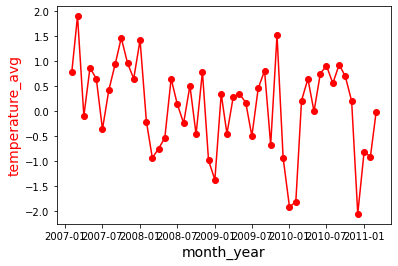

In [ ]:
## Plot of how temperature avg changes over the period using temperature avg columns and month_year column 

# create figure and axis objects with subplots()
from matplotlib import pyplot as plt
fig,ax = plt.subplots()

ax.plot(df_new.month_year,
        df_new.temperature_avg,
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("month_year", fontsize = 14)
# set y-axis label
ax.set_ylabel("temperature_avg",
              color="red",
              fontsize=14)


In [ ]:
## Plotting Average historic temperature deviation versus climate change (denier/believer) ratio over time

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_new.month_year, df_new["denier_believer_ratio"],color="blue",marker="o")
ax2.set_ylabel("denier_believer_ratio",color="blue",fontsize=14)
plt.show()
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

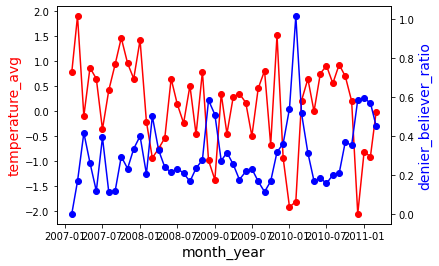

In [ ]:
fig

**Deviation from average temperature after creating equal bins versus the number of tweets  and average sentiment**

In [14]:
df_equal_bin = df[['topic','temperature_avg','sentiment']]


In [17]:
df_equal_bin = df_equal_bin[df_equal_bin['temperature_avg'].between(-10, 10)]
df_avgtemp_vs_catcodes = pd.DataFrame()
df_avgtemp_vs_catcodes['avg_temp_bins']=pd.cut(df_equal_bin['temperature_avg'],25)
df_avgtemp_vs_catcodes['cat_codes']=pd.cut(df_equal_bin['temperature_avg'],25).cat.codes
df_avgtemp_vs_catcodes

,avg_temp_bins,cat_codes
0,"(-1.2, -0.4]",11
1,"(3.6, 4.4]",17
2,"(5.2, 6.0]",19
3,"(-2.0, -1.2]",10
4,"(4.4, 5.2]",18
...,...,...
312688,"(1.2, 2.0]",14
312689,"(-0.4, 0.4]",12
312690,"(-2.0, -1.2]",10
312691,"(0.4, 1.2]",13


In [ ]:
##average temperature bins and their cat codes (Just for reference) 

df_avgtemp_vs_catcodes = pd.DataFrame()
##Forming equal-sized bins from temperature deviations and converting them into cat codes to plot 
df_avgtemp_vs_catcodes['Average temperature bins'] = pd.cut(df_equal_bin['temperature_avg'],25)
df_avgtemp_vs_catcodes['cat codes'] = pd.cut(df_equal_bin['temperature_avg'],25).cat.codes
df_avgtemp_vs_catcodes['cat codes']

0         12
1         15
2         16
3         12
4         16
          ..
312688    14
312689    13
312690    12
312691    13
312692    14
Name: cat codes, Length: 312693, dtype: int8

In [ ]:
#subsettting the temperature avg between -10 and 10 since values lower and higher than that can be considered as outliers
#and these are extreme abnormalities in temperature and volume of tweets in these bins is very low
df_equal_bin = df_equal_bin[df_equal_bin['temperature_avg'].between(-10, 10)]

## converted the subsetted avg temperature into cat codes for plotting
df_equal_bin['temp_avg_bin'] = pd.cut(df_equal_bin['temperature_avg'],25).cat.codes
df_equal_bin

,topic,temperature_avg,sentiment,temp_avg_bin
0,Weather Extremes,-1.11,0.58,11
1,Ideological Positions on Global Warming,4.23,-0.54,17
2,Weather Extremes,5.48,-0.57,19
3,Weather Extremes,-1.65,0.65,10
4,Weather Extremes,4.86,0.67,18
...,...,...,...,...
312688,Seriousness of Gas Emissions,1.82,-0.41,14
312689,Ideological Positions on Global Warming,-0.25,0.45,12
312690,Weather Extremes,-1.24,0.54,10
312691,Seriousness of Gas Emissions,1.06,0.06,13


In [ ]:
##count of number of tweets in the particular temperature avg bin
df_topic_count = df_equal_bin.groupby('temp_avg_bin')['topic'].count().reset_index()
df_topic_count

,temp_avg_bin,topic
0,0,1426
1,1,2032
2,2,2735
3,3,4261
4,4,5120
5,5,6753
6,6,8894
7,7,11027
8,8,14615
9,9,18673


In [ ]:
##getting the mean sentiment  grouped by particular bin
df_month_senti = df_equal_bin.groupby(df_equal_bin['temp_avg_bin'])['sentiment'].mean()
df_month_senti = df_month_senti.to_frame().reset_index()
df_topic_count['mean_sentiment']=df_month_senti['sentiment']
df_topic_count


,temp_avg_bin,topic,mean_sentiment
0,0,1426,-0.072798
1,1,2032,-0.073445
2,2,2735,-0.075316
3,3,4261,-0.058578
4,4,5120,-0.057738
5,5,6753,-0.069074
6,6,8894,-0.060198
7,7,11027,-0.045446
8,8,14615,-0.046656
9,9,18673,-0.042030


<Figure size 432x288 with 0 Axes>

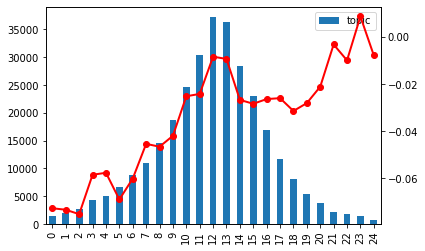

In [ ]:
##Plot of average temperature versus number of tweets and mean sentiment
##bar graph implies number of tweets in the particular bin
##line graph implies how mean sentiment changes over the particular average temperature bins
fig = plt.figure()
ax = df_topic_count[['topic']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(df_topic_count[['mean_sentiment']].values, linestyle='-', marker='o', linewidth=2.0,color="red")

**Deviation from average temperature after creating equal bins versus the number of tweets and denier/believer ratio**

In [ ]:
df_stance_temp_bin = df[['topic','temperature_avg','stance']]

#subsettting the temperature avg between -10 and 10 since values lower and higher than that can be considered as outliers
#and these are extreme abnormalities in temperature and volume of tweets in these bins is very low
df_stance_temp_bin = df_stance_temp_bin[df_stance_temp_bin['temperature_avg'].between(-10, 10)]

## converted the subsetted avg temperature into cat codes for plotting
df_stance_temp_bin['Average temperature bins'] = pd.cut(df_stance_temp_bin['temperature_avg'],25).cat.codes
df_stance_temp_bin

,topic,temperature_avg,stance,Average temperature bins
0,Weather Extremes,-1.11,0,11
1,Ideological Positions on Global Warming,4.23,0,17
2,Weather Extremes,5.48,-1,19
3,Weather Extremes,-1.65,0,10
4,Weather Extremes,4.86,0,18
...,...,...,...,...
312688,Seriousness of Gas Emissions,1.82,-1,14
312689,Ideological Positions on Global Warming,-0.25,0,12
312690,Weather Extremes,-1.24,0,10
312691,Seriousness of Gas Emissions,1.06,0,13


In [ ]:
##Getting the count of each stance grouping by Average temperature bins
df_stance_avg_temp_bin = pd.crosstab(df_stance_temp_bin['stance'],df_stance_temp_bin['Average temperature bins'] )
df_stance_avg_temp_bin = df_stance_avg_temp_bin.T
df_stance_avg_temp_bin = df_stance_avg_temp_bin.add_prefix('stance ').reset_index().rename_axis(None, axis=1)
df_stance_avg_temp_bin

,Average temperature bins,stance -1,stance 0,stance 1
0,0,293,677,456
1,1,489,876,667
2,2,719,1215,801
3,3,1029,1752,1480
4,4,1036,2200,1884
5,5,1363,2818,2572
6,6,1636,3758,3500
7,7,1843,4502,4682
8,8,2216,5954,6445
9,9,2656,7390,8627


In [ ]:
##Getting the denier believer ratio by Average temperatue bins
df_stance_avg_temp_bin.rename(columns = {'stance -1':'stance_-1', 'stance 0':'stance_0','stance 1':'stance_1'}, inplace = True)
df_stance_avg_temp_bin['denier_believer_ratio'] = df_stance_avg_temp_bin['stance_-1']/df_stance_avg_temp_bin['stance_1']
#df_stance_avg_temp_bin = df_stance_avg_temp_bin.iloc[3:]
df_stance_avg_temp_bin

,Average temperature bins,stance_-1,stance_0,stance_1,denier_believer_ratio
0,0,293,677,456,0.642544
1,1,489,876,667,0.733133
2,2,719,1215,801,0.897628
3,3,1029,1752,1480,0.695270
4,4,1036,2200,1884,0.549894
5,5,1363,2818,2572,0.529938
6,6,1636,3758,3500,0.467429
7,7,1843,4502,4682,0.393635
8,8,2216,5954,6445,0.343832
9,9,2656,7390,8627,0.307871


In [ ]:
df_stance_avg_temp_bin['topic'] = df_topic_count['topic']

In [ ]:
##Drooping the individual stance columns since we got denier/believer ratio
df_stance_avg_temp_bin = df_stance_avg_temp_bin.drop('stance_-1', axis=1)
df_stance_avg_temp_bin = df_stance_avg_temp_bin.drop('stance_0', axis=1)
df_stance_avg_temp_bin = df_stance_avg_temp_bin.drop('stance_1', axis=1)
df_stance_avg_temp_bin

,Average temperature bins,denier_believer_ratio,topic
0,0,0.642544,1426
1,1,0.733133,2032
2,2,0.897628,2735
3,3,0.695270,4261
4,4,0.549894,5120
5,5,0.529938,6753
6,6,0.467429,8894
7,7,0.393635,11027
8,8,0.343832,14615
9,9,0.307871,18673


<Figure size 432x288 with 0 Axes>

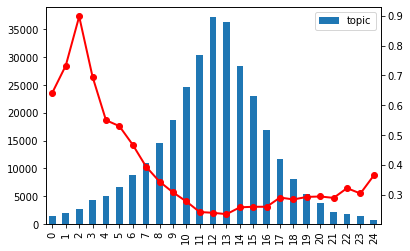

In [ ]:
## Deviation from average temperature after creating  equal bins versus the number of tweets and denier/believer ratio
##Plot of average temperature versus number of tweets and denier/believer ratio
##bar graph implies number of tweets in the particular temperature avg bin
##line graph implies how denier/believer ratio changes over the particular average temperature bins
fig = plt.figure()
ax = df_stance_avg_temp_bin[['topic']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(df_stance_avg_temp_bin[['denier_believer_ratio']].values, linestyle='-', marker='o', linewidth=2.0,color="red")

** Distinguish tweets about climate change into Believer , Denier and Neutral**

In [ ]:
dfsub

,topic,stance
0,Weather Extremes,neutral
1,Ideological Positions on Global Warming,neutral
2,Weather Extremes,denier
3,Weather Extremes,neutral
4,Weather Extremes,neutral
...,...,...
312688,Seriousness of Gas Emissions,denier
312689,Ideological Positions on Global Warming,neutral
312690,Weather Extremes,neutral
312691,Seriousness of Gas Emissions,neutral


In [ ]:
stance_dict = {'believer' : 1,
                'neutral' : 0,
                'denier' : -1,
                }


dfsub['stance'] = dfsub['stance'].map(stance_dict )

<ipython-input-104-8499b5f81f9f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsub['stance'] = dfsub['stance'].map(stance_dict )


In [ ]:
dfsub

,topic,stance
0,Weather Extremes,0
1,Ideological Positions on Global Warming,0
2,Weather Extremes,-1
3,Weather Extremes,0
4,Weather Extremes,0
...,...,...
312688,Seriousness of Gas Emissions,-1
312689,Ideological Positions on Global Warming,0
312690,Weather Extremes,0
312691,Seriousness of Gas Emissions,0


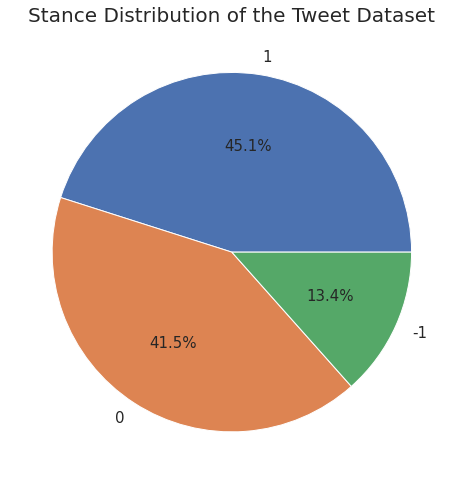

In [ ]:
plt.figure(figsize = (7, 7))
plt.pie(dfsub.stance.value_counts().values, labels = dfsub.stance.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Stance Distribution of the Tweet Dataset', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
def vectorizeList(stemmedList, ngramRangeStart, ngramRangeEnd):
    '''
    Creates a matrix of word vectors.
    :param stemmedList: stemmed sentence list
    :return: matrix of word vectors and vocabulary dictionary
    '''
    cv = CountVectorizer(binary=True, ngram_range=(ngramRangeStart, ngramRangeEnd))
    cv.fit(stemmedList)
    X = cv.transform(stemmedList)

    return X, cv.vocabulary_

In [ ]:
def createTokenizedArray(sentences):
    '''
    Create lower case array of words with no punctuation.
    :param sentences: array or series of texts
    :return: lower case array of words with no punctuation.
    '''
    # Initialize tokenizer and empty array to store modified sentences.
    tokenizer = RegexpTokenizer(r'\w+')
    tokenizedArray = []
    for i in range(0, len(sentences)):
        # Convert sentence to lower case.
        sentence = sentences[i].lower()

        # Split sentence into array of words with no punctuation.
        words = tokenizer.tokenize(sentence)

        # Append word array to list.
        tokenizedArray.append(words)

    # print(tokenizedArray)
    return tokenizedArray  # send modified contents back to calling function.

In [ ]:
dfTweets = dfsub["topic"]

In [ ]:
dfTweets.isna().sum()

0

In [ ]:
tokenizedLi = createTokenizedArray(dfTweets)

pd.Series(tokenizedLi[:5])

0                              [weather, extremes]
1    [ideological, positions, on, global, warming]
2                              [weather, extremes]
3                              [weather, extremes]
4                              [weather, extremes]
dtype: object

In [ ]:
# To get stop words.
nltk.download('stopwords')

def removeStopWords(tokenList):
    '''
    Create array of words with no punctuation or stop words.
    :param tokenList: tokenized list
    :return: array of words with no punctuation or stop words.
    '''
    stopWords = set(stopwords.words('english'))
    shorterSentences = []  # Declare empty array of sentences.

    for sentence in tokenList:
        shorterSentence = []  # Declare empty array of words in single sentence.
        for word in sentence:
            if word not in stopWords:

                # Remove leading and trailing spaces.
                word = word.strip()

                # Ignore single character words and digits.
                if (len(word) > 1 and word.isdigit() == False):
                    # Add remaining words to list.
                    shorterSentence.append(word)
        shorterSentences.append(shorterSentence)
    return shorterSentences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tokenizedNoStopLi = removeStopWords(tokenizedLi)

In [ ]:
print(f"Sample sentence BEFORE removing stop words:\n{tokenizedLi[4]}")
print(f"\n\nSample sentence AFTER removing stop words:\n{tokenizedNoStopLi[4]}")

Sample sentence BEFORE removing stop words:
['weather', 'extremes']


Sample sentence AFTER removing stop words:
['weather', 'extremes']


In [ ]:
def stemWords(sentenceArrays):
    '''
    Removes suffixes and rebuilds the sentences.
    :param sentenceArrays: stentences list
    :return: array of sentences without suffixes
    '''
    #ps = PorterStemmer()
    stemmedSentences = []
    for sentenceArray in sentenceArrays:
        stemmedArray = []  # Declare empty array of words.
        for word in sentenceArray:
            stemmedArray.append(word)  # Add stemmed word.

        # Convert array back to sentence of stemmed words.
        delimeter = ' '
        sentence = delimeter.join(stemmedArray)

        # Append stemmed sentence to list of sentences.
        stemmedSentences.append(sentence)
    return stemmedSentences

In [ ]:
stemmedLi = stemWords(tokenizedNoStopLi)

print(f"Sample sentence BEFORE stemming:\n{tokenizedNoStopLi[0]}")
print(f"\nSample sentence AFTER stemming:\n{stemmedLi[0]}")

Sample sentence BEFORE stemming:
['weather', 'extremes']

Sample sentence AFTER stemming:
weather extremes


In [ ]:
vectorizedTweets, vectorDictionary = vectorizeList(stemmedLi, 1, 1)

In [ ]:
print(f"Sample sentence #1:\n{stemmedLi[0]}")
print(f"Sample sentence #2:\n{stemmedLi[5]}")

Sample sentence #1:
weather extremes
Sample sentence #2:
weather extremes


In [ ]:
stemmedLi

['weather extremes',
 'ideological positions global warming',
 'weather extremes',
 'weather extremes',
 'weather extremes',
 'weather extremes',
 'impact resource overconsumption',
 'global stance',
 'global stance',
 'importance human intervantion',
 'importance human intervantion',
 'weather extremes',
 'weather extremes',
 'weather extremes',
 'weather extremes',
 'importance human intervantion',
 'global stance',
 'global stance',
 'weather extremes',
 'global stance',
 'global stance',
 'undefined one word hashtags',
 'global stance',
 'weather extremes',
 'importance human intervantion',
 'politics',
 'weather extremes',
 'importance human intervantion',
 'weather extremes',
 'weather extremes',
 'weather extremes',
 'importance human intervantion',
 'seriousness gas emissions',
 'importance human intervantion',
 'weather extremes',
 'importance human intervantion',
 'donald trump versus science',
 'weather extremes',
 'weather extremes',
 'importance human intervantion',
 'glob

In [ ]:
print(f"\nSample sentence before vectorization:\n{stemmedLi[0]}")
print(f"\nSample sentence after vectorization:\n{vectorizedTweets[0]}")
print(f"\nSample sentence before vectorization:\n{stemmedLi[5]}")
print(f"\nSample sentence after vectorization:\n{vectorizedTweets[5]}")


Sample sentence before vectorization:
weather extremes

Sample sentence after vectorization:
  (0, 4)	1
  (0, 27)	1

Sample sentence before vectorization:
weather extremes

Sample sentence after vectorization:
  (0, 4)	1
  (0, 27)	1


In [ ]:
vectorizedTweets.shape

(312693, 29)

In [ ]:
def generateWordList(wordDf, sentimentScore, n_gram_size):
    resultDf = wordDf[(wordDf['stance'] == sentimentScore)]

    sentences = [sentence.split() for sentence in resultDf['transformedTweets']]
    wordArray = []
    for i in range(0, len(sentences)):
        wordArray += sentences[i]

    counterList = Counter(ngrams(wordArray, n_gram_size)).most_common(80)

    counterDf = pd.DataFrame()

    delimiter = ' '
    print(f"\n***N-Gram (Stance: {sentimentScore})")
    for i in range(0, len(counterList)):
        counterDict = {
            "N-Gram" : delimiter.join(counterList[i][0])
            ,"Occurrences" : counterList[i][1]
        }
        # convert dict to series before concating to the dataframe.
        counterDict = pd.DataFrame(counterDict, index=[0])
        counterDf = pd.concat([counterDf, counterDict], ignore_index=True)

    return counterDf

In [ ]:
SIZE = 2
# add transformedTweets column to the original dataset with the stemmed data.
dfsub['transformedTweets'] = stemmedLi
dfnew = dfsub[['stance', 'transformedTweets']]

<ipython-input-122-1ba7a4adf729>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsub['transformedTweets'] = stemmedLi


In [ ]:
dfnew

,stance,transformedTweets
0,0,weather extremes
1,0,ideological positions global warming
2,-1,weather extremes
3,0,weather extremes
4,0,weather extremes
...,...,...
312688,-1,seriousness gas emissions
312689,0,ideological positions global warming
312690,0,weather extremes
312691,0,seriousness gas emissions


In [ ]:
counterDfAntiTop = generateWordList(dfnew, 0, SIZE)
counterDfAntiTop = counterDfAntiTop.head(20)
counterDfAntiTop = pd.DataFrame(counterDfAntiTop)
counterDfAntiTop = counterDfAntiTop.drop(1)
counterDfAntiTop


***N-Gram (Stance: 0)


,N-Gram,Occurrences
0,weather extremes,52302
2,global stance,18252
3,importance human,14787
4,human intervantion,14787
5,donald trump,9420
6,trump versus,9420
7,versus science,9420
8,seriousness gas,9232
9,gas emissions,9232
10,ideological positions,8018



***N-Gram (Stance: -1)
                   N-Gram  Occurrences
0        weather extremes        18708
2            donald trump         7367
3            trump versus         7367
4          versus science         7367
5         seriousness gas         4529
6           gas emissions         4529
7   ideological positions         3594
8        positions global         3594
9          global warming         3594
10        science weather         2855
11        extremes donald         2836
12          global stance         2191
13       importance human         2107
14     human intervantion         2107
15         science donald         1733
16   extremes seriousness         1721
17      emissions weather         1676
18   extremes ideological         1397
19        warming weather         1387


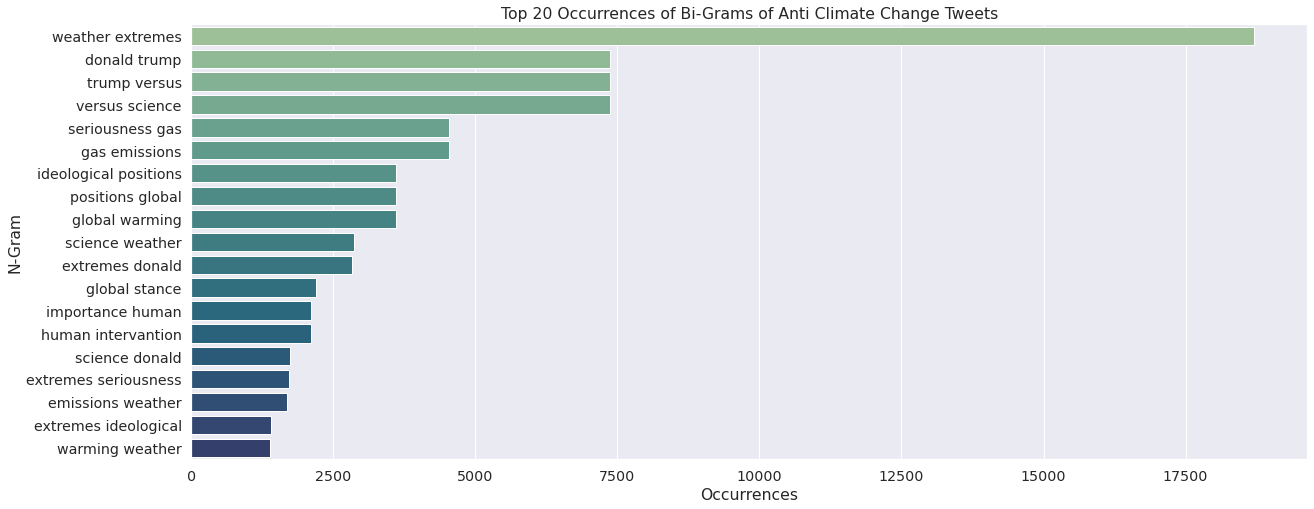

In [ ]:
counterDfAntiTop = generateWordList(dfnew, -1, SIZE)
counterDfAntiTop = counterDfAntiTop.head(20)
counterDfAntiTop = pd.DataFrame(counterDfAntiTop)
counterDfAntiTop = counterDfAntiTop.drop(1)
print(counterDfAntiTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Bi-Grams of Anti Climate Change Tweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfAntiTop, palette="crest")


***N-Gram (Stance: 0)
                   N-Gram  Occurrences
0        weather extremes        52302
1        extremes weather        26154
2           global stance        18252
3        importance human        14787
4      human intervantion        14787
5            donald trump         9420
6            trump versus         9420
7          versus science         9420
8         seriousness gas         9232
9           gas emissions         9232
10  ideological positions         8018
11       positions global         8018
12         global warming         8018
13         stance weather         5429
14        extremes global         5352
15          stance global         4490
16    extremes importance         4011
17   intervantion weather         3914
18        extremes donald         3856
19        science weather         3792


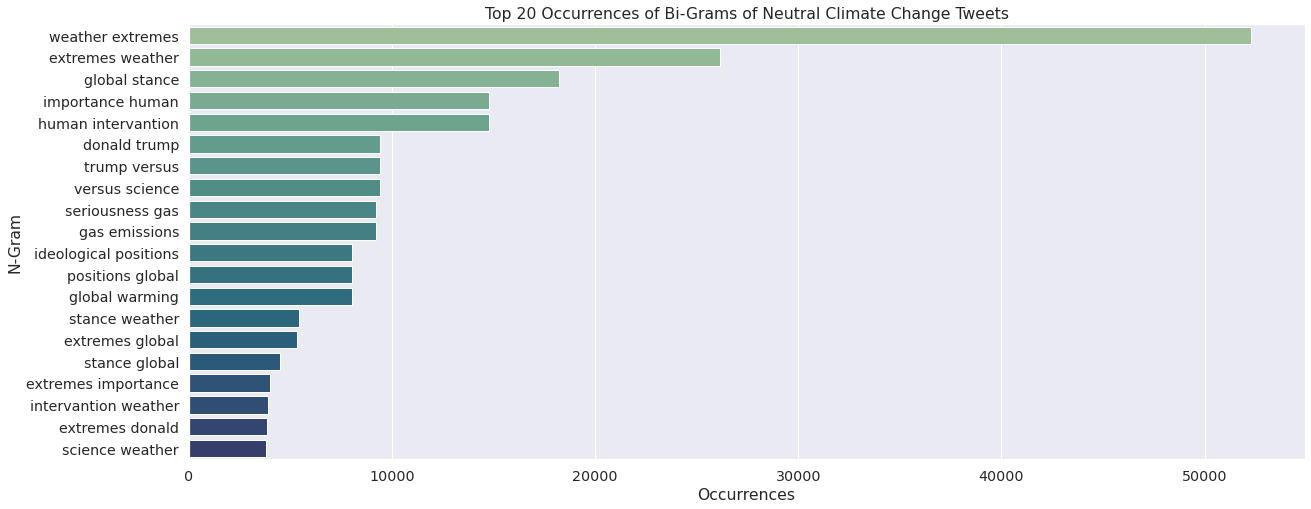

In [ ]:
counterDfAntiTop = generateWordList(dfnew, 0, SIZE)
counterDfAntiTop = counterDfAntiTop.head(20)
counterDfAntiTop = pd.DataFrame(counterDfAntiTop)
#counterDfAntiTop = counterDfAntiTop.drop(1)
print(counterDfAntiTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Bi-Grams of Neutral Climate Change Tweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfAntiTop, palette="crest")


***N-Gram (Stance: 1)
                     N-Gram  Occurrences
0             global stance        38110
1          weather extremes        27647
2          importance human        25318
3        human intervantion        25318
4             stance global        13617
5           seriousness gas        11033
6             gas emissions        11033
7          extremes weather         8792
8              donald trump         8594
9              trump versus         8594
10           versus science         8594
11      intervantion global         7479
12        stance importance         7408
13  intervantion importance         7165
14            undefined one         5835
15                 one word         5835
16            word hashtags         5835
17           stance weather         5313
18          extremes global         5291
19    ideological positions         4816


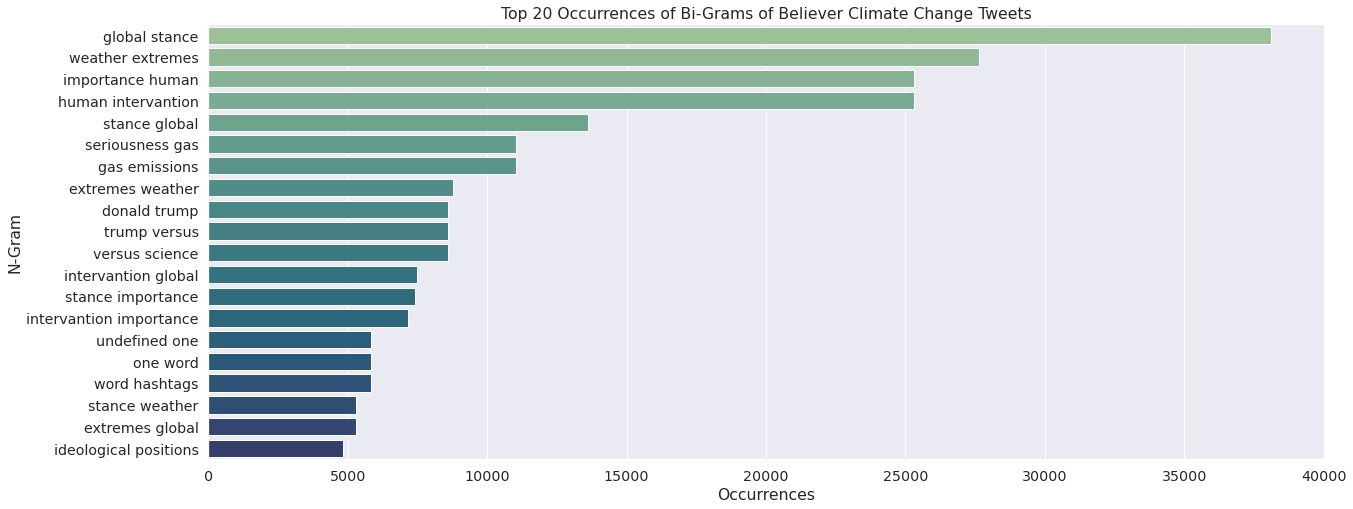

In [ ]:
counterDfAntiTop = generateWordList(dfnew, 1, SIZE)
counterDfAntiTop = counterDfAntiTop.head(20)
counterDfAntiTop = pd.DataFrame(counterDfAntiTop)
#counterDfAntiTop = counterDfAntiTop.drop(1)
print(counterDfAntiTop)

sns.set(font_scale = 1.3)
plt.figure(figsize=(20,8))
plt.title("Top 20 Occurrences of Bi-Grams of Believer Climate Change Tweets")
sns.set_style('darkgrid')
sns.barplot(x="Occurrences", y="N-Gram", data=counterDfAntiTop, palette="crest")

In [ ]:
def evaluateModel(model, X_test, y_test, title):
    '''
    print out classification scores
    :param model: used model
    :param X_test:
    :param y_test:
    :param title: title of the model
    '''
    print("\n*** " + title + " ***")
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    recall = metrics.recall_score(y_test, predictions, average='weighted')
    precision = metrics.precision_score(y_test, predictions, average='weighted')
    f1 = metrics.f1_score(y_test, predictions, average='weighted')

    clsScoreDict = {
        "accuracy": accuracy
        , "recall": recall
        , "precision": precision
        , "f1": f1
    }

    print("Accuracy:  " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall:    " + str(recall))
    print("F1:        " + str(f1))
    print("\n\n")

    return clsScoreDict

In [ ]:
def modelAndPredict(X, target, model):
    '''
    Build model and predict scores.

    :param X: X contains the stemmed and vectorized sentences.
    :param target: the sentiment rating
    :param model: selected model
    :return: X_test, y_test, and y_predicted values.
    '''

    modelType = model.__class__.__name__

    # Create training set with 75% of data and test set with 25% of data.
    X_train, X_test, y_train, y_test = train_test_split(
        X, target, train_size=0.75
    )

    # Build the model with the training data.
    clfModel = model.fit(X_train, y_train)
    clsScoreDict = evaluateModel(clfModel, X_test, y_test, modelType)


    # Predict target values.
    y_prediction = model.predict(X_test)

    return X_test, y_test, y_prediction, clsScoreDict

In [ ]:
# bi-gram vectorization
NGRAM_RANGE_START = 2
NGRAM_RANGE_END = 2

vectorizedTweets2, vectorDictionary2 = vectorizeList(stemmedLi, NGRAM_RANGE_START, NGRAM_RANGE_END)

**1.Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
X_test, y_test, y_predicted, lrScoreDict = modelAndPredict(vectorizedTweets, dfnew['stance'], model)



*** LogisticRegression ***
Accuracy:  0.5439916084631718
Precision: 0.46849741420081714
Recall:    0.5439916084631718
F1:        0.5028721257202691





/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_test, y_test, y_predicted, lrScoreDict2 = modelAndPredict(vectorizedTweets2, dfnew['stance'], model)


*** LogisticRegression ***
Accuracy:  0.5462813723232789
Precision: 0.47190802751902927
Recall:    0.5462813723232789
F1:        0.5059038710246513





/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Classifier**

In [ ]:
#model = SVC()

In [ ]:
#X_test, y_test, y_predicted, svcScoreDict = modelAndPredict(vectorizedTweets, dfnew['stance'], model)

**Decision Tree**

In [ ]:
model = DecisionTreeClassifier(max_depth=20)

In [ ]:
X_test, y_test, y_predicted, treeScoreDict = modelAndPredict(vectorizedTweets, dfnew['stance'], model)


*** DecisionTreeClassifier ***
Accuracy:  0.5403203111008775
Precision: 0.46455371652952854
Recall:    0.5403203111008775
F1:        0.4991008583149207





/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier()

In [ ]:
X_test, y_test, y_predicted, rfScoreDict = modelAndPredict(vectorizedTweets, dfnew['stance'], model)


*** RandomForestClassifier ***


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5439532325325556
Precision: 0.4689549899962705
Recall:    0.5439532325325556
F1:        0.5032245943645288





**K Neighbors Classifier**

In [ ]:
#model = KNeighborsClassifier()

In [ ]:
#X_test, y_test, y_predicted, knnScoreDict = modelAndPredict(vectorizedTweets, dfnew['stance'], model)


*** KNeighborsClassifier ***


**Ridge Classifier**

In [ ]:
model = RidgeClassifier()

In [ ]:
X_test, y_test, y_predicted, ridgeScoreDict = modelAndPredict(vectorizedTweets, df['stance'], model)


*** RidgeClassifier ***


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5447975030061145
Precision: 0.46952938641147945
Recall:    0.5447975030061145
F1:        0.5039573385986679





In [ ]:
lrScoreDf1 = pd.DataFrame(lrScoreDict, index=["Logistic Regression with unigram"])
lrScoreDf2 = pd.DataFrame(lrScoreDict2, index=["Logistic Regression with bigram"])
treeScoreDf = pd.DataFrame(treeScoreDict, index=["Decision Tree"])
rfScoreDf = pd.DataFrame(rfScoreDict, index=["Random Forest Classification"])
ridgeScoreDf = pd.DataFrame(ridgeScoreDict, index=["Ridge Classification"])

clsCompDf = pd.concat([lrScoreDf1,lrScoreDf2, treeScoreDf, rfScoreDf, ridgeScoreDf])

clsCompDf.sort_values(by=["accuracy", "f1"], ascending = False)


,accuracy,recall,precision,f1
Logistic Regression with bigram,0.546281,0.546281,0.471908,0.505904
Ridge Classification,0.544798,0.544798,0.469529,0.503957
Logistic Regression with unigram,0.543992,0.543992,0.468497,0.502872
Random Forest Classification,0.543953,0.543953,0.468955,0.503225
Decision Tree,0.540320,0.540320,0.464554,0.499101
